In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

categories = pd.read_csv('topics.csv').to_numpy()
df = pd.read_csv('DCForTrain.csv')['sentences']
vectors = TfidfVectorizer().fit_transform(df)


In [4]:
y_train_numpy = pd.read_csv('y_train_numpy.csv')
y_train_numpy = map(lambda x: int(x[0]),y_train_numpy.to_numpy())
y_train_numpy = list(y_train_numpy)
y_train_numpy.insert(0, 0)

In [5]:
from sklearn.decomposition import TruncatedSVD

X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(vectors)
X_reduced.shape

(45693, 50)

In [6]:
from sklearn.manifold import TSNE

In [7]:
X_embedded = TSNE(n_components=2, perplexity=30).fit_transform(X_reduced)

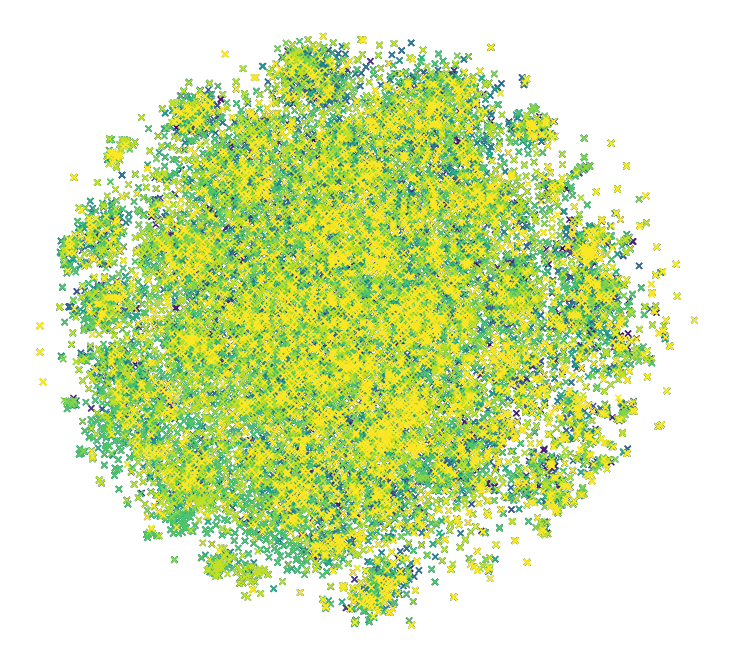

In [8]:
fig = figure(figsize=(10, 10))
ax = axes(frameon=False)
setp(ax, xticks=(), yticks=())
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
scatter(X_embedded[:, 0], X_embedded[:, 1],
        c=y_train_numpy , marker="x")

In [22]:
print(len(y_train_numpy))
X_embedded


45693


array([[ 23.155586 , -17.64755  ],
       [ 20.294727 , -15.862614 ],
       [  7.0058956,  39.432552 ],
       ...,
       [ -4.1378326,  23.281721 ],
       [ 24.754267 ,  58.994164 ],
       [ 49.351624 , -27.45361  ]], dtype=float32)

In [24]:
df = pd.DataFrame(X_embedded.copy())
df['topic'] = y_train_numpy
y_df = pd.DataFrame(y_train_numpy.copy())
X_embedded_train = pd.DataFrame()
y_train = pd.DataFrame()
X_embedded_test = pd.DataFrame()
y_test = pd.DataFrame()
for value in df.topic.unique():
    temp = df.loc[df['topic'] == value]
    y_temp = y_df.loc[df['topic'] == value]
    X_embedded_train = X_embedded_train.append(temp.iloc[:temp.index.size//2, :])
    y_train =y_train.append(y_temp.iloc[:temp.index.size//2, :])
    X_embedded_test = X_embedded_test.append(temp.iloc[temp.index.size//2:, :])
    y_test =y_test.append(y_temp.iloc[temp.index.size//2:, :])
    
X_embedded_train = X_embedded_train.drop(columns=['topic'])
X_embedded_test = X_embedded_test.drop(columns=['topic'])
print(X_embedded_train.shape)
print(y_train.shape)
print(X_embedded_test.shape)
print(y_test.shape)

(22844, 2)
(22844, 1)
(22849, 2)
(22849, 1)


In [27]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X = X_embedded_train, y =  list(map(lambda x: int(x[0]), y_train.to_numpy())))
from joblib import dump, load
dump(clf, 'tfidf.joblib') 

['tfidf.joblib']

In [28]:
Y_pridict = clf.predict(X_embedded_test)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, Y_pridict )

0.09807869053350256

In [30]:
accuracy_score(y_train, clf.predict(X_embedded_train))

0.11937489056207319